# lec 15 시계열, arima

### 1) 정의 
* 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법 
* 과거의 패턴이 미래에도 지속된다는 데이터의 안정성이 기본적인 가정으로 필요

### 2) 시계열 패턴

* <font color=red> $T$ </font> 추세(trend) : 데이터가 장기적으로 증가하거나 감소하는 패턴
* <font color=red> $S$ </font>계절성(seasonality) : 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴
* <font color=red> $C$ </font>주기성(cycle) : 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로,일정 주기가 없으며 장기적인 변화 현상
* <font color=red> $R$ </font> 불규칙요소(Random, Residual) : 추세, 순환, 계절성은 뺀 나머지, 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임이의 변동
### 3) 시계열 패턴 분해
* <b>덧셈 분해(additive decomposition)</b>&nbsp; Trend와 Seasonal이 별개, $ y_t = S_t+T_t+R_t $
* <b>곱셈 분해(multiplicative decomposition)</b>&nbsp; Trend에 따라 Seasonal이 변화,  $ y_t = S_t*T_t*R_t $ , 데이터에 0이 존재해서는 안된다.

<font color='blue'>
Additive : 시간에 지남에 따라(Trend가 변화함에 따라) 변동폭이 일정&nbsp; &nbsp; &nbsp; &nbsp;
Multiplicative : Trend가 상승함에 따라 변동폭 증가 </font>
<img src=./img/img33.png>
### 4) 정상성
* 시간에 따른 평균&분산이 일정한 패턴


### <font color=red> 5) 비정상성 데이터를 정상성(평균,분산 일정)으로 만드는 방법
*  <font color=red>변동폭이 일정하지 않은 경우 : 로그 변환</font>
*  <font color=red>추세, 계절성이 존재하는 경우 : 차분(y_t - y_{t-1}) </font>

<pre>
* (a)와 같이 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 비정상 시계열 데이터
* (b)로그변환 --> 변동폭 일정
* (c)차분 --> 평균 일정
* (d)로그변환+차분 --> 평균과 분산이 일정한 정상 시계열로 변환
</pre>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcPUgQm%2Fbtq5Fhh5em0%2FhaKQOzuv0kEE3eYfLNOpLK%2Fimg.jpg'>

### AR(Autoregression) 자기상관 모델
* <font color=red> 이전의 자신의 관측값을 이용하여 미래의 값을 예측하는 모델 --> 자기 자신의 과거를 사용(자기상관성)</font>
* $Y_t = (Y_{t-1} * w) + …  +c + (e_t * u)$
*  e(t) : white-noise(백색 잡음)  : 일반적인 정규분포(평균이 0, 분산이 1인 정규분포)에서 도출된 random noise 값
*  (X(t-1) * w) + b을 평균으로 가지며 u만큼을 분산으로 가지는 정규분포를 따른다
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" width=400>

### ARMA(Autoregressive Moving Average) 모델
* AR + MA 결합
* <img src='https://t1.daumcdn.net/cfile/tistory/99EAB33A5C39D1AD27'>

### ARIMA(p, d, q) 모수 설정
* <font color=red>d차 차분한 데이터에 AR과 MA 모형을 합친 모델 --> AR모형의 Lag : p,  MA모형의 Lag : q, 차분(Diffrence)횟수 : d </font>
* AR(p) = ARIMA(p, 0, 0)
* MA(q) = ARIMA(0, 0, q)
* ARMA(p, q) = ARIMA(p, 0, q)

<h3>ACF(Autocorrelation function) :자기상관함수 </h3>
<pre>
* 시차에 따른 관측치들 사이의 관련성(자기상관성)을 측정하는 함수
* 정상계열: 빠르게 0에 수렴, 비정상계열:천천히 감소
</pre>

<h3>PACF(Partial autocorrelation function) :편자기상관함수 </h3>
<pre>
* k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  y_t와 y_t_k 두 관측치의 관련성을 측정하는 함수 </pre>

---
* AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 시차 p이후 급격히 감소
* MA의 특성을 띄는 경우, ACF는 시차 q이후 급격히 감소하고 PACF는 천천히 감소
* 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용

https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html

```PYTHON
class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)
```

# 실습: 날씨예측
* https://www.kaggle.com/datasets/smid80/weatherww2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ------------------------------------------------------ 훈련데이터
from sklearn.datasets import load_iris
# --------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
# -------------------------------------------------------------------------- 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# -------------------------------------------------------------------------- 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# -------------------------------------------------------------------------- 모델
from sklearn.cluster import KMeans, DBSCAN
# -------------------------------------------------------------------------- 평가
from sklearn.metrics import silhouette_score
# -------------------------------------------------------------------------- 교차검증


import warnings
warnings.filterwarnings(action="ignore")

In [23]:
df = pd.read_csv('Summary of Weather.csv', parse_dates=['Date'])[['STA','Date','MeanTemp']]
df.columns=['sta','rdate','temp']
df = df.set_index('rdate')
df.head()

,sta,temp
rdate,,
1942-07-01,10001,23.888889
1942-07-02,10001,25.555556
1942-07-03,10001,24.444444
1942-07-04,10001,24.444444
1942-07-05,10001,24.444444


In [26]:
df = df[df['sta']==10001]
df.head()

,sta,temp
rdate,,
1942-07-01,10001,23.888889
1942-07-02,10001,25.555556
1942-07-03,10001,24.444444
1942-07-04,10001,24.444444
1942-07-05,10001,24.444444


In [27]:
df.drop('sta',axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1157 entries, 1942-07-01 to 1945-08-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    1157 non-null   float64
dtypes: float64(1)
memory usage: 18.1 KB


In [30]:
df.describe()

,temp
count,1157.000000
mean,26.514933
std,1.777196
min,20.555556
25%,25.000000
50%,26.666667
75%,27.777778
max,30.555556


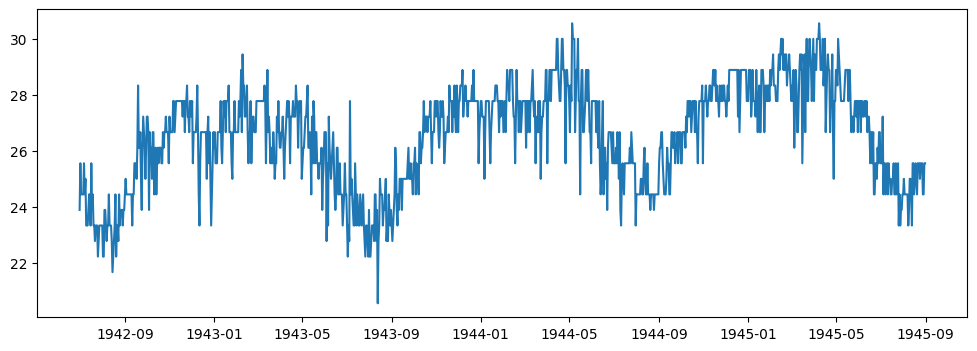

In [33]:
plt.figure(figsize=(12,4))
plt.plot(df)
plt.show()

# 시계열 분해

``` python
statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
```
addictive -> 덧셈분해

* ref: https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1200x400 with 0 Axes>

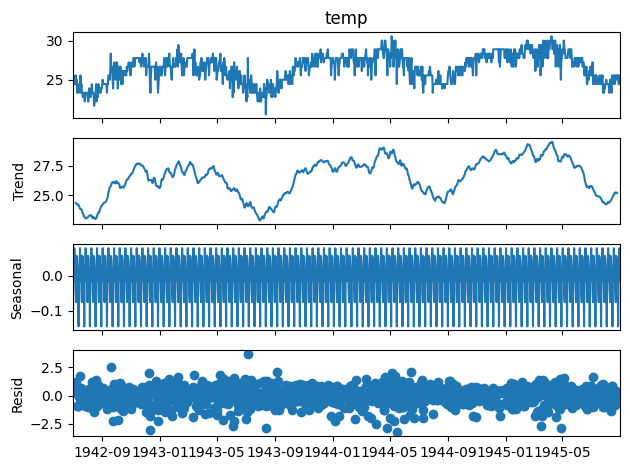

In [41]:
res = seasonal_decompose(df['temp'], model='additive', period=12)
# period: default 'month'
# 시계열 기본 조건은 1년
# 일별은 데이터량이 적어서 학습이 잘 안된다
plt.figure(figsize=(12,4))
res.plot()
plt.show()

## 평균일정, 분산일정 => 정상성의 특징

whitenoise - 잔차 아웃라이어

## 정상성 검정* <b>Augmented Dickey-Fuller test(ADF)</b>    * 검정 조건 ( p-value : 5% 이내면 reject으로 대체가설 선택됨 )    * <font color=red><b>귀무가설(H0): non-stationary.    * <font color=red><b>대체가설 (H1): stationary.<pre>statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)returnadfThe test statistic.<b>pvalueMacKinnon’s approximate p-value based on MacKinnon (1994, 2010).</b>usedlagThe number of lags used.nobsThe number of observations used for the ADF regression and calculation of the critical values.critical valuesCritical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).icbestThe maximized information criterion if autolag is not None.resstoreA dummy class with results attached as attributes.

* H0(귀무): 시계열 데이터는 일반적으로 비정상성을 띈다 (랜덤워크)
* H1(대립): 아니다! 정상성. 분석가능!

``` python
statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
```

<pre>
AIC:
OLS report
손실 가중치 계산 (낮을 수록 좋다)
X피쳐
모델 적합도
선형회귀 규제와 비슷

In [43]:
from statsmodels.tsa.stattools import adfuller

In [46]:
res = adfuller(df, autolag='AIC')
res

(-2.411973896374036,
 0.13838534571230615,
 12,
 1144,
 {'1%': -3.436079050499444,
  '5%': -2.8640697479399972,
  '10%': -2.5681169015905425},
 2851.0688744560252)

In [48]:
res[1]
# 유의수준 0.05보다 크다(pvalue): 귀무가설 채택! 

0.13838534571230615

In [59]:
temp=df[:5]
temp, temp.shift(-1), temp.shift(1) #1,2,-1,,,

(                 temp
 rdate                
 1942-07-01  23.888889
 1942-07-02  25.555556
 1942-07-03  24.444444
 1942-07-04  24.444444
 1942-07-05  24.444444,
                  temp
 rdate                
 1942-07-01  25.555556
 1942-07-02  24.444444
 1942-07-03  24.444444
 1942-07-04  24.444444
 1942-07-05        NaN,
                  temp
 rdate                
 1942-07-01        NaN
 1942-07-02  23.888889
 1942-07-03  25.555556
 1942-07-04  24.444444
 1942-07-05  24.444444)

# 데이터 정상성 변환
* 분산: 로그변환
* 평균: 차분 df.shift() - 1일차분, 결측처리 반드시

# 데이터 전후값으로 채워라
-결측처리는
-ffill(폭포는 아래로), bfill

In [60]:
temp = temp.shift()
temp.fillna(method='bfill', inplace=True)
temp

,temp
rdate,
1942-07-01,23.888889
1942-07-02,23.888889
1942-07-03,25.555556
1942-07-04,24.444444
1942-07-05,24.444444


In [61]:
temp = temp.shift(-1)
temp.fillna(method='ffill', inplace=True)
temp

,temp
rdate,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


In [68]:
df_diff = df - df.shift()
df_diff.fillna(method='bfill')

,temp
rdate,
1942-07-01,1.666667
1942-07-02,1.666667
1942-07-03,-1.111111
1942-07-04,0.000000
1942-07-05,0.000000
...,...
1945-08-27,0.000000
1945-08-28,-1.111111
1945-08-29,0.000000


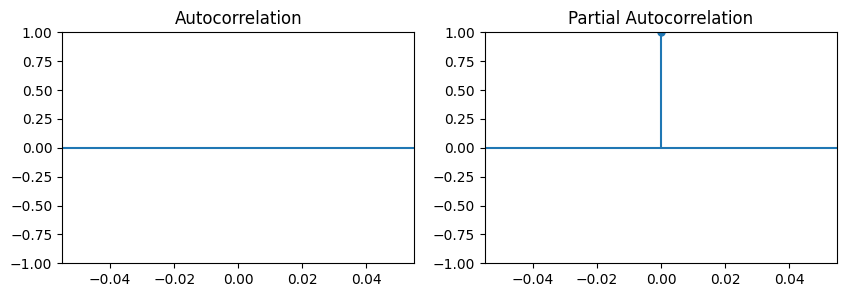

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,3))
ax1 = plt.subplot(1,2,1)
plot_acf(df_diff,   ax=ax1)

ax2 = plt.subplot(1,2,2)
plot_pacf(df_diff,   ax=ax2)

plt.show()